In [49]:
#Michael Lust
#801094861
#Real Time AI (4106)
#March 1, 2022

In [50]:
from torchvision import models, datasets, transforms
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd 
import matplotlib.pyplot as plt  

In [51]:
#Problem 1 Building Fully connected neural network for housing dataset

In [52]:
#Problem 1 part a Using 1 hidden layer with 8 nodes

In [53]:
dataset = pd.DataFrame(pd.read_csv('Housing.csv'))
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [54]:
m = len(dataset)
m

545

In [55]:
dataset.shape

(545, 13)

In [56]:
#This is taking an assumption that we are focusing on these explanatory variables from homework 1 and not all of them
#-> that can be found in the housing.csv dataset.
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
Newtrain = dataset[num_vars] 
Newtrain.head() 

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [57]:
Newtrain.values[:, 0]

array([ 7420,  8960,  9960,  7500,  7420,  7500,  8580, 16200,  8100,
        5750, 13200,  6000,  6550,  3500,  7800,  6000,  6600,  8500,
        4600,  6420,  4320,  7155,  8050,  4560,  8800,  6540,  6000,
        8875,  7950,  5500,  7475,  7000,  4880,  5960,  6840,  7000,
        7482,  9000,  6000,  6000,  6550,  6360,  6480,  6000,  6000,
        6000,  6000,  6600,  4300,  7440,  7440,  6325,  6000,  5150,
        6000,  6000, 11440,  9000,  7680,  6000,  6000,  8880,  6240,
        6360, 11175,  8880, 13200,  7700,  6000, 12090,  4000,  6000,
        5020,  6600,  4040,  4260,  6420,  6500,  5700,  6000,  6000,
        4000, 10500,  6000,  3760,  8250,  6670,  3960,  7410,  8580,
        5000,  6750,  4800,  7200,  6000,  4100,  9000,  6400,  6600,
        6000,  6600,  5500,  5500,  6350,  5500,  4500,  5450,  6420,
        3240,  6615,  6600,  8372,  4300,  9620,  6800,  8000,  6900,
        3700,  6420,  7020,  6540,  7231,  6254,  7320,  6525, 15600,
        7160,  6500,

In [58]:
#Copying dataset to fix SettingWithCopyWarning: 
Newtrain_copy = Newtrain.copy()

#Apply normalization to dataset to 
for column in Newtrain.columns:
    Newtrain_copy[column] = Newtrain_copy[column]  / Newtrain_copy[column].abs().max()

Newtrain_copy.head()

,area,bedrooms,bathrooms,stories,parking,price
0,0.458025,0.666667,0.50,0.75,0.666667,1.000000
1,0.553086,0.666667,1.00,1.00,1.000000,0.921053
2,0.614815,0.500000,0.50,0.50,0.666667,0.921053
3,0.462963,0.666667,0.50,0.50,1.000000,0.918421
4,0.458025,0.666667,0.25,0.50,0.666667,0.857895


In [59]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

#The split is 80%-20% for training and testing respectively. 
np.random.seed(0)
Newtrain,Newtest = train_test_split(Newtrain_copy, train_size = 0.8, test_size = 0.2, random_state = 1)

#Displaying training shape to verify
Newtrain.shape

(436, 6)

In [60]:
#Displaying test shape to verify
Newtest.shape

(109, 6)

In [61]:
#Training set
y_Newtrain = Newtrain.pop('price')
x_Newtrain = Newtrain
#Validation set
y_Newtest = Newtest.pop('price')
x_Newtest = Newtest

In [62]:
#Labeling for model 

#Training
x_T = torch.tensor(x_Newtrain.values).float()
x_V = torch.tensor(x_Newtest.values).float()

#Validation
y_T = torch.tensor(y_Newtrain.values).float().unsqueeze(-1)
y_V = torch.tensor(y_Newtest.values).float().unsqueeze(-1)

#Verifying test split 
x_T.shape

torch.Size([436, 5])

In [63]:
#Modified training loop to return Epoch and Cost Values to graph
def training_loop(n_epochs, optimizer, model, loss_fn, x_T, x_V, y_T, y_V):

    #Main training loop for both training set and validation set
    for epoch in range(1, n_epochs + 1):
        t_p_T = model(x_T)
        loss_T = loss_fn(t_p_T, y_T)
        
        t_p_V = model(x_V)
        
        loss_V = loss_fn(t_p_V, y_V)

        #Passing optimizer and loss function
        optimizer.zero_grad()
        loss_T.backward()
        optimizer.step()

    #Printing out Epochs and Loss
    if epoch == 1 or epoch % 10 == 0:
        print(f"Epoch {epoch}, Training Loss is {loss_T.item():.4f},"
              f" Validation Loss is {loss_V.item():.4f}")

    #return optimizer, loss_arr_T, loss_arr_V, n_epochs_arr

In [64]:
#Now creating hidden layer for model
#Starting of with 1 hidden layer or linear module. 8 hidden features or nodes was chosen arbitrarily.
#Naming each module in Sequential using OrderedDict
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
            ('hidden_linear', nn.Linear(len(num_vars)-1,8)), #Hidden Layer 1
            ('hidden_activation', nn.Tanh()),
            ('output_linear', nn.Linear(8,1)) #Outer Layer
]))
seq_model

Sequential(
  (hidden_linear): Linear(in_features=5, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [65]:
#Collecting weights and biases using model.parameters()
[param.shape for param in seq_model.parameters() ]

[torch.Size([8, 5]), torch.Size([8]), torch.Size([1, 8]), torch.Size([1])]

In [66]:
#Showing tensors from the optimizer
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 5])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [67]:
len(num_vars) #Checking length of num_vars to correctly establish linear model

6

In [68]:
#Explanatory names for submodule
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 5])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [69]:
#Accessing particular parameters using submodules as atributes
seq_model.output_linear.bias

Parameter containing:
tensor([0.1777], requires_grad=True)

In [70]:
#Now testing neural network with a learing rate at 0.001 with hidden features and 1 layer
optimizer = optim.SGD(seq_model.parameters(), lr = 1e-2)

training_loop(
    n_epochs = 200,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(), #This replaces the loss function from earlier
    x_T = x_T,
    x_V = x_V,
    y_T = y_T,
    y_V = y_V,
    )

print('output', seq_model(x_V))
print('answer', y_V)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 200, Training Loss is 0.0168, Validation Loss is 0.0216
output tensor([[0.3859],
        [0.4751],
        [0.3981],
        [0.2987],
        [0.3203],
        [0.3248],
        [0.3859],
        [0.4729],
        [0.3214],
        [0.3146],
        [0.3691],
        [0.3162],
        [0.2937],
        [0.3123],
        [0.4671],
        [0.4326],
        [0.4495],
        [0.3339],
        [0.3253],
        [0.3250],
        [0.3706],
        [0.3836],
        [0.3182],
        [0.3082],
        [0.3773],
        [0.4479],
        [0.3850],
        [0.3931],
        [0.3429],
        [0.2856],
        [0.2763],
        [0.3444],
        [0.3090],
        [0.3797],
        [0.4313],
        [0.3043],
        [0.3203],
        [0.3839],
        [0.2949],
        [0.3812],
        [0.2969],
        [0.3719],
        [0.3083],
        [0.3168],
        [0.3834],
        [0.3277],
        [0.4545],
        [0.3900],
        [0.3207],
        [0.3106],
        [0.4395],
        [0.37

In [71]:
#Problem 1 Part b Expanding network with 2 more additional layers

In [72]:
seq_model_2 = nn.Sequential(OrderedDict([
            ('hidden_linear', nn.Linear(len(num_vars)-1,8)), #Hidden Layer 1
            ('hidden_activation', nn.Tanh()),
            ('hidden_linear', nn.Linear(8,5)), #Hidden Layer 2
            ('hidden_activation', nn.Tanh()),
            ('hidden_linear', nn.Linear(5,2)), #Hidden Layer 3 
            ('hidden_activation', nn.Tanh()),
            ('output_linear', nn.Linear(2,1)) #Outer Layer
]))
seq_model_2

Sequential(
  (hidden_linear): Linear(in_features=5, out_features=2, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=2, out_features=1, bias=True)
)

In [73]:
#Now testing neural network with a learing rate at 0.01 with hidden features and 1 layer
optimizer = optim.SGD(seq_model_2.parameters(), lr = 1e-2)

training_loop(
    n_epochs = 200,
    optimizer = optimizer,
    model = seq_model_2,
    loss_fn = nn.MSELoss(), #This replaces the loss function from earlier
    x_T = x_T,
    x_V = x_V,
    y_T = y_T,
    y_V = y_V,
    )

print('output', seq_model_2(x_V))
print('answer', y_V)
print('hidden', seq_model_2.hidden_linear.weight.grad)

Epoch 200, Training Loss is 0.0183, Validation Loss is 0.0234
output tensor([[0.3908],
        [0.3592],
        [0.3842],
        [0.3976],
        [0.3787],
        [0.3413],
        [0.3143],
        [0.3389],
        [0.3427],
        [0.3812],
        [0.3576],
        [0.4040],
        [0.4002],
        [0.4057],
        [0.3193],
        [0.3811],
        [0.2855],
        [0.3375],
        [0.4172],
        [0.3412],
        [0.3335],
        [0.3693],
        [0.4161],
        [0.3841],
        [0.3493],
        [0.3229],
        [0.3147],
        [0.3641],
        [0.4062],
        [0.4044],
        [0.4315],
        [0.4050],
        [0.4024],
        [0.3529],
        [0.3427],
        [0.3617],
        [0.4199],
        [0.3152],
        [0.3996],
        [0.3522],
        [0.4217],
        [0.3564],
        [0.3840],
        [0.4037],
        [0.3962],
        [0.3401],
        [0.2832],
        [0.3125],
        [0.3430],
        [0.3830],
        [0.3455],
        [0.35

In [74]:
#Problem 2 Creating Neural Network for all 10 features with CIFAR-10

In [75]:
#Problem 2 Part a Using 1 hidden layer with size of 512

In [76]:
#Choosing the 10 classes to base model out off (using the read me file to pick classes)
class_names = ['dolphin', 'seal', 'otter', 'shark', 'ray', 'flatfish', 'beaver', 'aquarium fish', 'trout', 'whale']

In [77]:
#Dowloading CIFAR-10
from torchvision import datasets
data_path = 'CIFAR'
cifar10 = datasets.CIFAR10(data_path, train = True, download = True) #Gathering training data
cifar10_val = datasets.CIFAR10(data_path, train = False, download = True) #Gathering validation data

Files already downloaded and verified
Files already downloaded and verified


In [78]:
#Checking length of CIFAR 10
len(cifar10)

50000

In [79]:
img, label = cifar10[99]

In [80]:
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x1697CDE7E20>, 1, 'seal')

In [81]:
#Converting PIL images to PyTorch using transform function
from torchvision import transforms

#Seeing available objects
#dir(transforms) 

In [82]:
#Turning PIL images to tensors
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [83]:
#Passing transfomr to CIFAR10
tensor_cifar10 = datasets.CIFAR10(data_path, train = True, download = False, transform = transforms.ToTensor())

img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [84]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

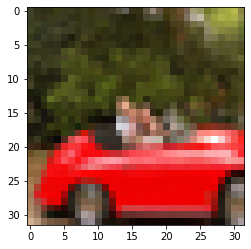

In [85]:
#Verifying Image output and changing CxHxW to HxWxC for matplotlib
plt.imshow(img_t.permute(1,2,0))
plt.show()

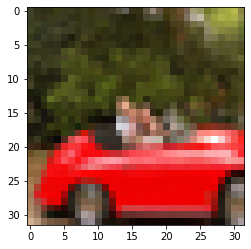

In [86]:
#Normalizing tensor as shown in lecture 9
transformed_cifar10 = datasets.CIFAR10(data_path, train = True, download = False, transform = transforms.Compose([
                                       transforms.ToTensor(), 
                                       transforms.Normalize((0.4915, 0.4823, 0.4468),(0.2470, 0.2435, 0.2616))
                                        ]))
img_t, _ = tensor_cifar10[99]

plt.imshow(img_t.permute(1,2,0))
plt.show()

In [87]:
#Creating neural network for testing and validation

In [88]:
#Normalizing PIL to tensor for training and validation
cifar10_T = datasets.CIFAR10(data_path, train = True, download = False, transform = transforms.Compose([
                                       transforms.ToTensor(), 
                                       transforms.Normalize((0.4915, 0.4823, 0.4468),(0.2470, 0.2435, 0.2616))
                                        ]))
cifar10_V = datasets.CIFAR10(data_path, train = False, download = False, transform = transforms.Compose([
                                       transforms.ToTensor(), 
                                       transforms.Normalize((0.4915, 0.4823, 0.4468),(0.2470, 0.2435, 0.2616))
                                        ]))

In [89]:
#Creating subclass to include the labels in class_names
label_map = {0: 0, 2: 1}

cifar10_train = [(img, label_map[label]) for img, label in cifar10_T if label in [0,2]]
cifar10_test = [(img, label_map[label]) for img, label in cifar10_V if label in [0,2]]

In [90]:
#Setting GPU to run nn
device = torch.device(
    "cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda


In [91]:
#Creating sequential model using train loader and steps in problem 1
train_loader = torch.utils.data.DataLoader(cifar10_train, batch_size = 64, shuffle = True)

model = nn.Sequential(
            nn.Linear(3072, 512), #Hidden Layer 1
            nn.Tanh(),
            nn.Linear(512, 2), #Outer Layer
            nn.LogSoftmax(dim = 1))

#Running on GPU
model.to(device)

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss_fn = nn.NLLLoss()
n_epochs = 200

for epoch in range(n_epochs + 1):
    for imgs, labels in train_loader:
        
        imgs, labels = imgs.to(device), labels.to(device) #Used for GPU
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    #Printing out Epochs and Loss
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))  

Epoch: 0, Loss: 0.650823
Epoch: 1, Loss: 0.675793
Epoch: 2, Loss: 0.362879
Epoch: 3, Loss: 0.642081
Epoch: 4, Loss: 0.312258
Epoch: 5, Loss: 0.201432
Epoch: 6, Loss: 0.256429
Epoch: 7, Loss: 0.271766
Epoch: 8, Loss: 0.326967
Epoch: 9, Loss: 0.372186
Epoch: 10, Loss: 0.470994
Epoch: 11, Loss: 0.297508
Epoch: 12, Loss: 0.269710
Epoch: 13, Loss: 0.331092
Epoch: 14, Loss: 0.338139
Epoch: 15, Loss: 0.218790
Epoch: 16, Loss: 0.292068
Epoch: 17, Loss: 0.556851
Epoch: 18, Loss: 0.467893
Epoch: 19, Loss: 0.380591
Epoch: 20, Loss: 0.142843
Epoch: 21, Loss: 0.245508
Epoch: 22, Loss: 0.393837
Epoch: 23, Loss: 0.310784
Epoch: 24, Loss: 0.158230
Epoch: 25, Loss: 0.398319
Epoch: 26, Loss: 0.139342
Epoch: 27, Loss: 0.186165
Epoch: 28, Loss: 0.443956
Epoch: 29, Loss: 0.132850
Epoch: 30, Loss: 0.068939
Epoch: 31, Loss: 0.159090
Epoch: 32, Loss: 0.240746
Epoch: 33, Loss: 0.060515
Epoch: 34, Loss: 0.160722
Epoch: 35, Loss: 0.148073
Epoch: 36, Loss: 0.102272
Epoch: 37, Loss: 0.143574
Epoch: 38, Loss: 0.135

In [92]:
#Measurning accuracy of the model on the training set
train_loader = torch.utils.data.DataLoader(cifar10_train, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        
        imgs, labels = imgs.to(device), labels.to(device) #Used for GPU
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim = 1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Training Accuracy: %f" % (correct / total))

Training Accuracy: 1.000000


In [93]:
#Measurning accuracy of the model on the validation set
val_loader = torch.utils.data.DataLoader(cifar10_test, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        
        imgs, labels = imgs.to(device), labels.to(device) #Used for GPU
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim = 1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Validation Accuracy: %f" % (correct / total))

Validation Accuracy: 0.818500


In [94]:
#Problem 2 part b Increasing network to two more additional layers

In [95]:
#Increasing model complexity using intermediate layers to improve model performance
#Dropping nn.LogSoftMax
#The combination of nn.LogSoftmax and nn.NLLLoss is equivalent to using nn.CrossEntropyLoss.
model2 = nn.Sequential(
            nn.Linear(3072, 1024), #Hidden Layer 1
            nn.Tanh(),
            nn.Linear(1024, 512), #Hidden Layer 2
            nn.Tanh(),
            nn.Linear(512, 128), #Hidden Layer 3
            nn.Tanh(),
            nn.Linear(128, 2)) #Outer Layer

#Running on GPU
model2.to(device)

#Repeating steps for accuracy for training and validation
learning_rate = 1e-2
optimizer = optim.SGD(model2.parameters(), lr = learning_rate)

loss_fn = nn.CrossEntropyLoss()
n_epochs = 200

for epoch in range(n_epochs + 1):
    for imgs, labels in train_loader:
        
        imgs, labels = imgs.to(device), labels.to(device) #Used for GPU
        batch_size = imgs.shape[0]
        outputs = model2(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    #Printing out Epochs and Loss
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))  

Epoch: 0, Loss: 0.808205
Epoch: 1, Loss: 0.746141
Epoch: 2, Loss: 0.695775
Epoch: 3, Loss: 0.661856
Epoch: 4, Loss: 0.637378
Epoch: 5, Loss: 0.616048
Epoch: 6, Loss: 0.594556
Epoch: 7, Loss: 0.571575
Epoch: 8, Loss: 0.546767
Epoch: 9, Loss: 0.520249
Epoch: 10, Loss: 0.492521
Epoch: 11, Loss: 0.464280
Epoch: 12, Loss: 0.436084
Epoch: 13, Loss: 0.408227
Epoch: 14, Loss: 0.380753
Epoch: 15, Loss: 0.353507
Epoch: 16, Loss: 0.326245
Epoch: 17, Loss: 0.298848
Epoch: 18, Loss: 0.271509
Epoch: 19, Loss: 0.244667
Epoch: 20, Loss: 0.218782
Epoch: 21, Loss: 0.194255
Epoch: 22, Loss: 0.171452
Epoch: 23, Loss: 0.150665
Epoch: 24, Loss: 0.132020
Epoch: 25, Loss: 0.115464
Epoch: 26, Loss: 0.100821
Epoch: 27, Loss: 0.087903
Epoch: 28, Loss: 0.076581
Epoch: 29, Loss: 0.063116
Epoch: 30, Loss: 0.063395
Epoch: 31, Loss: 0.055154
Epoch: 32, Loss: 0.051877
Epoch: 33, Loss: 0.049238
Epoch: 34, Loss: 0.034733
Epoch: 35, Loss: 0.035581
Epoch: 36, Loss: 0.088610
Epoch: 37, Loss: 0.037688
Epoch: 38, Loss: 0.012

In [96]:
#Measurning accuracy of the model on the training set for model2
train_loader = torch.utils.data.DataLoader(cifar10_train, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        
        imgs, labels = imgs.to(device), labels.to(device) #Used for GPU
        batch_size = imgs.shape[0]
        outputs = model2(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim = 1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Training Accuracy: %f" % (correct / total))

Training Accuracy: 1.000000


In [97]:
#Measurning accuracy of the model on the validation set for model2
val_loader = torch.utils.data.DataLoader(cifar10_test, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        
        imgs, labels = imgs.to(device), labels.to(device) #Used for GPU
        batch_size = imgs.shape[0]
        outputs = model2(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim = 1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Training Accuracy: %f" % (correct / total))

Training Accuracy: 0.807500
